## EC440 : VLSI CAD Assignment -1 
### Team Members:
Adithi S Upadhya <br>
191EC101 <br>
Poorvi S.H.M. <br>
191EC229 <br>

<h3>Theory</h3>

The rectilinear Steiner tree problem, minimum rectilinear Steiner tree problem (MRST), or rectilinear Steiner minimum tree problem (RSMT) is a variant of the geometric Steiner tree problem in the plane, in which the Euclidean distance is replaced with the rectilinear distance. 

The problem may be formally stated as follows: <b>given n points in the plane, it is required to interconnect them all by a shortest network which consists only of vertical and horizontal line segments.</b>

Application: (physical design of electronic design automation) In VLSI circuits, wire routing is carried out by wires running only in vertical and horizontal directions, due to high computational complexity of the task. Therefore wire length is the sum of the lengths of vertical and horizontal segments, and the distance between two pins of a net is actually the rectilinear distance ("Manhattan distance") between the corresponding geometric points in the design plane.

<h3>Problem statement</h3>

Given a set of points (vertices) (x, y), draw a minimum rectilinear steiner tree (MRST) connecting all these vertices.

Graphically plot this rectilinear tree and create an output text file as detailed below.

Input is given as an array of points like: {n, (x1, y1), (x2, y2), ......(xn. yn)} where
'n' is the number of points in the array, (xi, yi) is the ith point or vertex. The input data is given in a file by the name input.txt

Output file should be named as output.txt and should contain the following:
1) number of steiner points introduced,<br>
2) coordinates of these steiner points.<br>
3) Print the wire length of each segment<br>
4) Print the total wire length.<br>

Document the code appropriately. Appropriate prompts and message in the input / output will get additional weightage. Test your code with appropriate data set. Prove that the code is working with the following data:{6, (0,0), (2, 8), (4, 10), (6,0), (8, 2), (10, 2)}

In [1]:
import numpy as np 
# numpy - python library used for working with large and multidimensional arrays and matrices. 
# Documentation can be found at - https://numpy.org
import matplotlib.pyplot as plt
# matplotlib - library used for creating static, animated, and interactive visualizations in Python. 
# Documentation can be found at - https://matplotlib.org
import statistics
# This module provides functions for calculating mathematical statistics of numeric (Real-valued) data. 
# Documentation can be found at - https://docs.python.org/3/library/statistics.html

In [2]:
print("The input format should be: {n, (x1, y1), (x2, y2), ......(xn. yn)}")
filename = input("Enter input file name eg-input.txt: ")

The input format should be: {n, (x1, y1), (x2, y2), ......(xn. yn)}
Enter input file name eg-input.txt: inp1.txt


In [3]:
with open(filename, "r") as ip:
    inp = [line.strip() for line in ip]

# Removibg the '{}', n
inp = inp[0]
inp = inp.split(',') # The split() method splits a string into a list after breaking the given string by the specified separator.
n = int(inp[0].split('{')[1])
inp = inp[1:]
inp[len(inp)-1] = inp[len(inp)-1].split('}')[0]

# Removing the '(' and ')'
pts = []    # Stores all the points, x-coordinates in even position and y-coordinates in odd position
for i in inp:
    i = i.strip() #returns a copy of the string with both leading and trailing characters removed (based on the string argument passed). 
    i = i.strip('(')
    i = i.strip(')')
    pts.append(int(i))
    
# Storing the points in [(x1,y1), (x2,y2),....(xn,yn)]
points = []
i=0
while i!=len(pts):
    points.append([pts[i], pts[i+1]])
    i += 2

In [4]:
# To find maximum x-coordinate
def largest(arr, n):
    max = arr[0]
    for i in range(1, n):
        if arr[i] > max:
            max = arr[i]
    return max

# To find minimum y-coordinate
def smallest(arr, n):
    min = arr[0]
    for i in range(1, n):
        if arr[i] < min:
            min = arr[i]
    return min        

In [5]:
y_cood = []   # Stores all the y-coordinates of the points
x_cood = []   # Stores all the x-coordinates of the points
for p in points:
    y_cood.append(p[1])
    x_cood.append(p[0])

# Finding the y-coordinate that results in minimum distance from all other points 
y_trunk = statistics.median(y_cood)

# Finding maximum and minimum x-coordinates
x_max = largest(x_cood, n)
x_min = smallest(x_cood, n)

In [6]:
segment_length = []  # Stores the length of each segment
for y in y_cood:
    segment_length.append(abs(y-y_trunk))

# Finding the total wire length
wire_length = sum(segment_length) + (x_max - x_min)
print(wire_length)

28.0


In [7]:
steiner_points = []   # Stores all the steiner points

# Checks if the Steiner point already exists in the given points and if not appends it to the list
for p in points:
    if([p[0], y_trunk] not in points):
        steiner_points.append([p[0], y_trunk])

# Calculates the number of steiner points
print(len(steiner_points))

4


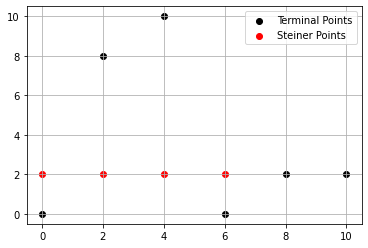

In [8]:
xs_cood = []    # stores the x-coordinates of the steiner points
ys_cood = []    # stores the y-coordinates of the steiner points
for p in steiner_points:
    xs_cood.append(p[0])
    ys_cood.append(p[1])

plt.scatter(x_cood, y_cood, label = 'Terminal Points', color = 'black')
plt.scatter(xs_cood, ys_cood, label = 'Steiner Points', color = 'red')
plt.grid()
plt.legend()
plt.show()

In [9]:
with open('output.txt', 'a') as op:
    print("-----------------------------------------------------------------------------------------------", file=op)
    print("Solution:-", file=op)
    print("No. of Steiner points is: ", len(steiner_points), file=op)
    print("The coordinate of the Steiner Points: ", steiner_points, file=op)
    print("Length of each wire segment: ", segment_length, file=op)
    print("Total length of wire: ", wire_length, file=op)
    print("------------------------------------------------------------------------------------------------", file=op)
op.close()